In [1]:
 from IPython.display import Latex
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn

  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7e/07/4b361d6d0f4e08942575f83a11d33f36897e1aae4279046606dd1808778a/matplotlib-3.1.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Usi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

0.25


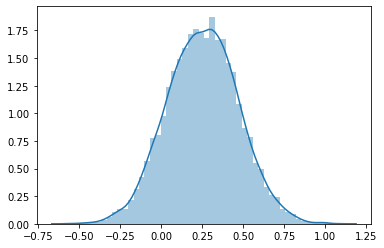

In [46]:
heads = 1
tails = 3
n = heads + tails

# frequentist approach
p = heads / (heads + tails)
print(p)
std_error = np.power(p*(1-p)/n, 0.5)
samples = scipy.stats.norm.rvs(p, std_error, size=n_samples)
sns.distplot(samples)

Bayesian approach

$x \sim Bernoulli(p)$

$p \sim Beta(a_{prior} + heads, b_{prior} + tails)$

In [6]:
a_prior = b_prior = 1
p = (a_prior + heads) / (a_prior + heads + b_prior + tails)
print(np.mean(samples))

0.3333333333333333


0.3341472581990384


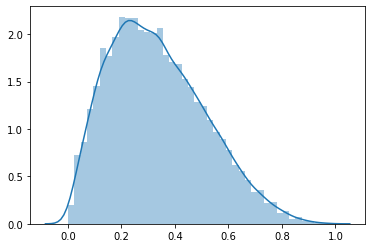

In [19]:
n_samples = 10**4
samples = scipy.stats.beta.rvs(a_prior + heads, b_prior + tails, size=n_samples)
sns.distplot(samples)
print(np.mean(samples))

0.25016507136343064


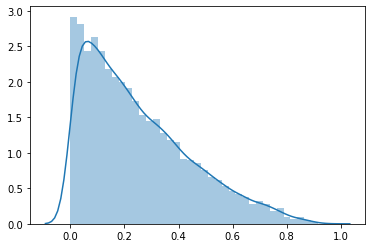

In [20]:
n_samples = 10**4
samples = scipy.stats.beta.rvs(heads, tails, size=n_samples)
sns.distplot(samples)
print(np.mean(samples))

Bayesian, frequentist equivalent approach

$x \sim Bernoulli(p)$

$p \sim Uniform(0,1)$

0.333333338888889
0.25
0.25
0.25


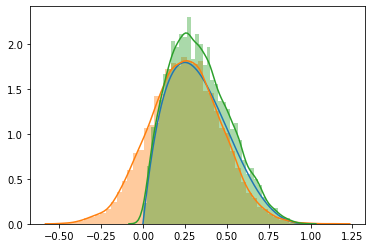

In [65]:
# illustrate using grid estimation
def likelihood_p_given_data(p):
    return scipy.stats.bernoulli.pmf(1, p)**heads * scipy.stats.bernoulli.pmf(0, p)**tails

likelihood_p_given_data = np.vectorize(likelihood_p_given_data)

steps = 10**4
grid_step_size = 1/steps
p_grid = np.array([0] + [grid_step_size * i for i in range(steps)])
prior_densities = scipy.stats.uniform.pdf(p_grid, 0, 1)
p_posterior =  likelihood_p_given_data(p_grid) * prior_densities
## some weird normalisation purely for plot purposes
p_posterior = p_posterior/max(p_posterior)*1.8
plt.plot(p_grid, p_posterior)
print(np.average(p_grid, weights=p_posterior))  ## note: not equivalent
print(p_grid[np.argmax(p_posterior)])

# frequentist approach
p = heads / (heads + tails)
print(p)
std_error = np.power(p*(1-p)/n, 0.5)
samples = scipy.stats.norm.rvs(p, std_error, size=n_samples)
sns.distplot(samples)

# Bayesian with Beta(1,1) prior
a_prior = b_prior = 1
sns.distplot(scipy.stats.beta.rvs(a_prior + heads, b_prior + tails, size=n_samples))
beta_likelihoods = scipy.stats.beta.pdf(p_grid, a_prior + heads, b_prior + tails)
print(p_grid[np.argmax(p_posterior)])